# Entropy

Lets take a look at how the entropy helps prevent us getting wrong conclusions. Wrong in the sense that it assumes more information than what we have to reason about it.

The Shannon Entropy for a for distributions of a discrete variable is $H(P) = - \sum_i p_i \ln p_i$. All write it in a python function so we can see how it works later.

In [162]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm as normal, beta, bernoulli
import scipy as sp

def entropy(p):
    Pi = np.atleast_1d(p).copy()
    Pi[Pi==0] = 2.
    lnPi = np.log(Pi)
    lnPi[lnPi>0] = 0.
    return -(Pi*lnPi).sum()

# Just a function to plot probabilities for a dice
def plot_p_dice(p,yt=np.arange(0,5)/4, ax=None, fig=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(3,3))
    ax.bar(np.arange(1,7),p,width=0.25)
    ax.set_xticks([1,2,3,4,5,6])
    ax.set_ylim([0,1])
    ax.set_yticks(yt)
    ax.set_xlabel('Face observed')
    ax.set_ylabel('P')
    for s in 'top right'.split():
        ax.spines[s].set_visible(False)
    return fig, ax

Consider we have a dice and we want to know whats is the probability of observing each face in a "fair" toss.
Consider that ALL we know about the dice is
  1. it has 6 face, each one with a different number of dots printed on it, from 1 dot to 6 dots
  2. the average of the number of dots in the faces of this dice is $3.5$

Given this information, can we find the probabilities we want?
Lets begin with two distribtutions that conform with the information we , the uniform 

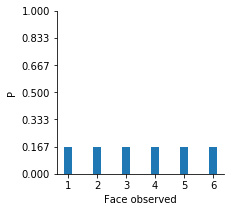

In [163]:
dice_p_uniform = np.array([1/6]*6)
_=plot_p_dice(dice_p_uniform, yt=np.arange(7)/6)

Notice that the average of the dots in the face of the dice with this distribution is

In [164]:
dice_uniform_mean = (np.arange(1,7)*dice_p_uniform).sum()
dice_uniform_mean

3.5

and a biased distribution for like that

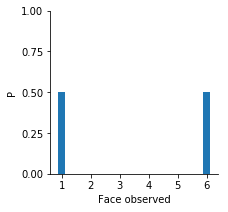

In [165]:
dice_p_biased_16 = np.array([1/2,0,0,0,0,1/2])
_=plot_p_dice(dice_p_biased_16)

and its mean is

In [166]:
dice_biased_16_mean = (np.arange(1,7)*dice_p_biased_16).sum()
dice_biased_16_mean

3.5

Now we can ask what is the entropy for each of this distributions? 

<BarContainer object of 2 artists>

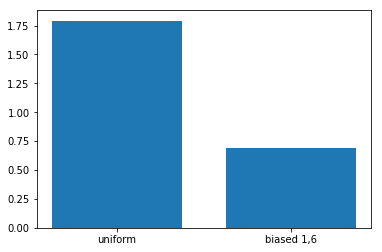

In [168]:
ent_uniform = entropy(dice_p_uniform)
ent_bias_16 = entropy(dice_p_biased_16)

plt.bar(['uniform', 'biased 1,6'],[ent_uniform, ent_bias_16],width=0.75)

We can see that the uniform has higher entropy than the biased. As we seen, we should always choose the highest entropy that is also compatible with the information available.

Lets see how each of these distributions perform against a sample of dice tosses.

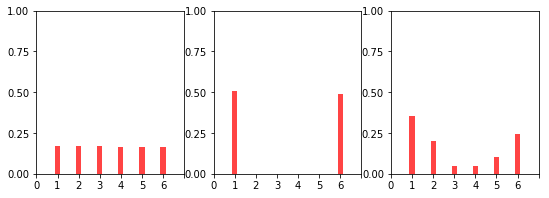

In [184]:
sample_1 = np.random.choice([1,2,3,4,5,6],size=10000)
sample_2 = np.random.choice([1,2,3,4,5,6],p=[0.5,0,0,0,0,0.5],size=10000)
sample_3 = np.random.choice([1,2,3,4,5,6],p=[0.35,0.2,0.05,0.05,0.1,0.25],size=10000)
fig,axs = plt.subplots(ncols=3,figsize=(9,3))
for ax,s in zip(axs,[sample_1,sample_2,sample_3]):
    y,x = np.histogram(s,np.arange(1,8),density=True)
    ax.bar(np.arange(1,7),y,width=0.25,color='#ff4444')
    ax.set_xticks([0,1,2,3,4,5,6,7])
    ax.set_xticklabels('0,1,2,3,4,5,6, '.split(','))
    ax.set_ylim([0,1])
    ax.set_yticks([0,1/4,1/2,3/4,1])

In [185]:
ps1,ps2,ps3 = [np.histogram(s,np.arange(1,8),density=True)[0] 
               for s in (sample_1,sample_2,sample_3)]
e1,e2,e3 = [entropy(ps) for ps in (ps1,ps2,ps3)]

In [186]:
m1,m2,m3 = [(np.arange(1,7)*ps).sum() for ps in (ps1,ps2,ps3)]
m1,m2,m3

(3.4724, 3.4595000000000002, 3.0862)

In [188]:
e1,e2,e3

(1.7915394244091107, 0.69301595481978, 1.5630650428642827)